# Lesson 05: Neural Networks as Code

- Adapted from: https://gitlab.com/wdeback/dl-keras-tutorial

Despite all the recent excitement around deep learning, neural networks have a somewhat deserved reputation among non-specialists, who view them as computationally intensive to train and apply, difficult to interpret, and tedious to build.

While interpretability remains an issue, and you're going to want access to some pretty serious hardware to train and deploy large networks, the process of building and experimenting with neural networks has gotten a lot easier recently.

That's because there are now _high-level_ neural network libraries that enable developers to quickly build neural network models without worrying about the numerical details of floating point operations, tensor algebra and GPU programming.

Today we're going to look at one of these libraries, _Keras_. Keras is a high-level neural network library that, among many other things, wraps an API similar to scikit-learn's around powerful backends like MXNet, Theano or TensorFlow backends. Over the years, the `keras` API has become so popular, that it is by now the go-to API for tensorflow itself.

Because of that similarity with _scikit-learn_, and to emphasize that neural network design and testing is now accessible to everyone, I'm going to give you a quick tutorial on how to use Keras.

Let's get started by importing the libraries we'll need: scikit-learn, Keras and some plotting features.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # nice plotting
import pandas as pd # data frames

# scikit-learn
from sklearn.model_selection import train_test_split

# using keras that is shipped with tensorflow today
from tensorflow import keras 
from tensorflow import random as tf_random

In [2]:
# attention: the following lines are needed to make sure
# everyone get's the same results, it is a reprod

import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(20210303)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(20210303)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf_random.set_seed(20210304)

# Penguins data (again)


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")

#clear NaN values
df = df.dropna()

#come up with categories
df["species"] = df.species.astype("category")

#prepare binary classification
df["is_adelie"] = (df.species.cat.codes < 1).astype(np.int8)

print(df.dtypes)

species              category
island                 object
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                    object
year                    int64
is_adelie                int8
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


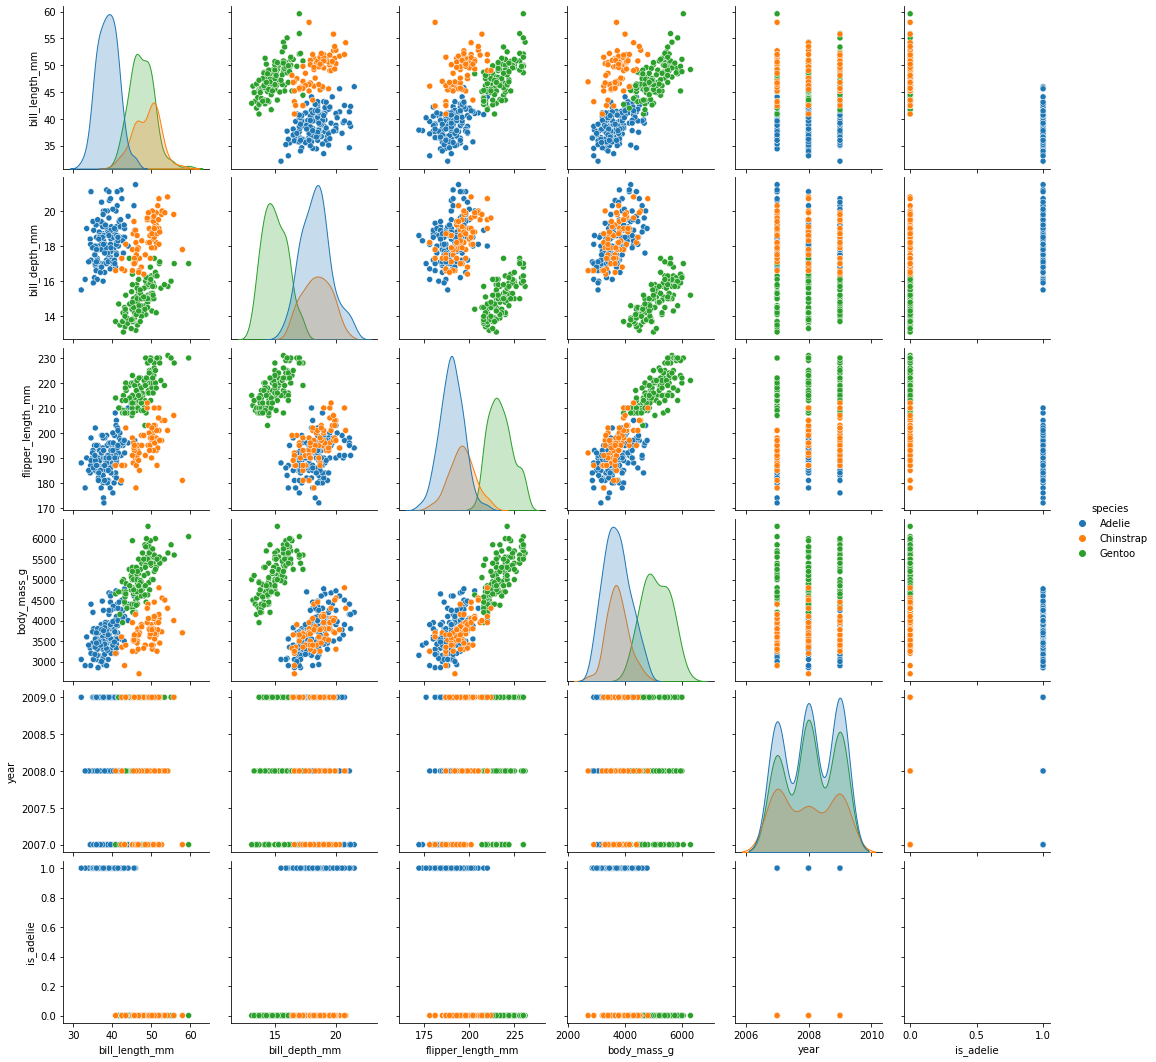

In [4]:
sns.pairplot(data=df, hue='species');

# Munge and split the data for training and testing

First we need to pull the raw data out of the `penguins` dataframe. We'll hold the flipper and bill features in an array `X` and the species labels in a corresponding array `y`.

In [5]:
X = df[['flipper_length_mm', 'bill_depth_mm', 'bill_length_mm']].values
y = df.is_adelie.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

As is standard in supervised machine learning, we'll train with some of the data, and measure the performance of our model with the remainder. This is simple to do by hand, but is also built into scikit-learn as the `train_test_split()` function.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=20210301)

print(X_train.shape)
print(X_test.shape)

(299, 3)
(34, 3)


# Now let's dive into Keras

In [7]:
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

Keras is a high-level neural network library created by [François Chollet](https://twitter.com/fchollet) at Google. The initial commit to its public Github repository was March 27, 2015.
As we just saw, scikit-learn makes building a classifier very simple:
 - one line to instantiate the classifier
 - one line to train it
 - and one line to measure its performance
 
Building a classifier is only a little bit more complicated in Keras. The data-munging changes a little bit, and we have to do some work to define the network before we instantiate it as a classifier, but otherwise it's very similar to working with scikit-learn.


### Hot encoding

we have three species :
<table>
<tr>
<th>Adelie</th>
<th>Chinstrap</th>
<th>Gentoo</th>
</tr>
<tr>
  <td>1</td>
  <td>0</td>
  <td>0</td>
</tr>
<tr>
  <td>0</td>
  <td>1</td>
  <td>0</td>
</tr>
<tr>
  <td>1</td>
  <td>0</td>
  <td>0</td>
</tr>
<tr>
  <td>0</td>
  <td>0</td>
  <td>1</td>
</tr>
</table>

There is a lot of ways to hot-encode the data.Keras utilties or scikit-learn, pandas ```get_dummies()```. here we will use ```np_utils```

In [8]:
#define a function to this for us

def hot_encode(arr):
  """transform the data in one-hot-encdoing representation """
  uniques, idx = np.unique(arr, return_inverse=True)
  return np_utils.to_categorical(idx, len(uniques))

In [9]:
y_train_ohe = hot_encode(y_train)
y_test_ohe = hot_encode(y_test)


In [10]:
print("test data before")

print(y_test[:5,...])

print("test data after")
print(y_test_ohe[:5,...])

print("train data before")
print(y_train[:5,...])

print("train data after ")
print(y_train_ohe[:5,...])

test data before
[0 0 1 0 0]
test data after
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
train data before
[0 1 1 0 0]
train data after 
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


### Build the neural network model

Aside from the dta munging required in this particular case, the most significant and important difference with working with keras is that you have to specify the structure of the model before you can instantiate and use it.

In scikit-learn, the models are off-the-shell, But Keras is a neutral network library, As such , while the number of features/classes in your data provide constraints, you can determine all the other aspects of model structure. number of layers. size of layers, the  nature of the connection between the layers, etc.

### Multi-Layer Perceptron


*   origins date back to 1943
*   achitecture modeled after biological neurons
*   soon found being capable of modeling any function






![feed-forward network](https://raw.githubusercontent.com/deeplearning540/lesson05/main/images/ann-p1_600px.png)

- The firstlayer is the input layer
- the middle layer is called the hidden layer
-each hidden layer can be expressed as $\vec{H} = F_{act}(W\cdot \vec{x} + \vec{b})$

![feed-forward network](https://raw.githubusercontent.com/deeplearning540/lesson05/main/images/ann-p7_600px.png)

- Layers can be stacked
- this is feed-forward network as the data is feed from front to back

### Let's Code !

In [11]:
from keras import layers
from keras import activations

x_inputs = layers.Input(shape=(3,))

#add hidden layers

dense1 = layers.Dense(14)
dense2 = layers.Dense(2)

#activation functions

relu = layers.Activation(activations.relu)
softmax = layers.Activation(activations.softmax)

![Activation](https://raw.githubusercontent.com/deeplearning540/lesson05/main/images/act-p1_600px.png)

In [12]:
x= dense1(x_inputs)
x = relu(x)
x= dense2(x)
y_out = softmax(x)

In [13]:
model = keras.Model(inputs=x_inputs, outputs=y_out, name="penguins_model")

model.summary()

Model: "penguins_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 14)                56        
                                                                 
 activation (Activation)     (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 30        
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])


In [16]:
history = model.fit(X_train, y_train_ohe, epochs=20, batch_size=1, validation_data=(X_test, y_test_ohe))


Epoch 1/20
299/299 [==============================] - 2s 4ms/step - loss: 7.7489 - accuracy: 0.2843 - val_loss: 1.9737 - val_accuracy: 0.1471
Epoch 2/20
299/299 [==============================] - 1s 3ms/step - loss: 2.1813 - accuracy: 0.3579 - val_loss: 1.7057 - val_accuracy: 0.2059
Epoch 3/20
299/299 [==============================] - 1s 3ms/step - loss: 2.0224 - accuracy: 0.3010 - val_loss: 1.3880 - val_accuracy: 0.2353
Epoch 4/20
299/299 [==============================] - 1s 3ms/step - loss: 1.7435 - accuracy: 0.3244 - val_loss: 1.1296 - val_accuracy: 0.2647
Epoch 5/20
299/299 [==============================] - 1s 3ms/step - loss: 1.3941 - accuracy: 0.3880 - val_loss: 0.9083 - val_accuracy: 0.5294
Epoch 6/20
299/299 [==============================] - 1s 3ms/step - loss: 1.1612 - accuracy: 0.4582 - val_loss: 0.8975 - val_accuracy: 0.4706
Epoch 7/20
299/299 [==============================] - 1s 3ms/step - loss: 0.9865 - accuracy: 0.5251 - val_loss: 0.5399 - val_accuracy: 0.7353
Epoch 

In [18]:
loss, Accuracy = model.evaluate(X_test, y_test_ohe)
print('Accuracy : {:.2f}'.format(Accuracy))

2/2 [==============================] - 0s 10ms/step - loss: 0.1495 - accuracy: 0.9412
Accuracy : 0.94


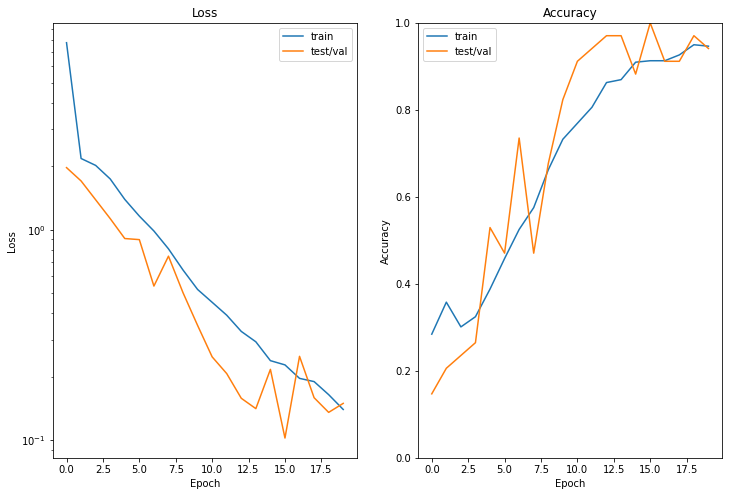

In [23]:
def plot_history(history, validation=False):
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8), sharex=True)
  #fig.tight_layout()

  #plot history for loss

  ax[0].plot(history.history['loss'])
  if validation:
    ax[0].plot(history.history['val_loss'])
  ax[0].set_title("Loss")
  ax[0].set_ylabel("Loss")
  ax[0].set_xlabel("Epoch")
  ax[0].set_yscale("log")
  ax[0].legend(["train", "test/val"])

  #plot history F score 
  ax[1].plot(history.history["accuracy"])
  if validation:
    ax[1].plot(history.history["val_accuracy"])
  ax[1].set_title("Accuracy")
  ax[1].set_ylim(bottom=0., top=1.0)
  ax[1].set_ylabel("Accuracy")
  ax[1].set_xlabel("Epoch")
  ax[1].legend(["train", "test/val"])

plot_history(history, validation=True)


# Summary
- Multi-layer perceptrons are a kind of artifical neural networks
- they are composed of `dense` layers (called hidden layers)

- each layer is followed by a non linear activation function

- the architecture showed first signs of overfitting

# Further Reading

Technical and engineering tutorials for your favourite language or library are easy to find, but if you're interested in some of the more conceptual and mathematical background, take a look at:
 - Michael Nielsen's online textbook "[Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)" (especially chapters 1, 2 and 3)
 - Weeks 4 and 5 of Andrew Ng's Coursera course "[Machine Learning](https://www.coursera.org/learn/machine-learning)" (you'll have to sign up for the course to access these materials)
 - "[Deep Learning](http://www.nature.com/nature/journal/v521/n7553/abs/nature14539.html)" by Yan Le Cun et al. in Nature (2015) (you can find a [PDF of this article on Google Scholar](https://scholar.google.com/scholar?cluster=5362332738201102290))
 
In fact, one key strength of neural networks (along with sheer predictive power) is their composability. Using a high-level library like Keras, it takes only a few seconds of work to create a very different network. Models can be built up like Lego. Have fun!